# End to End Face Mask Detection

## Datapreprocessing

In [1]:
# importing os module 
import os 

# Function to rename multiple files 
def main():
    for count, filename in enumerate(os.listdir("DATASET/")):
        dst ="withmask." + str(count) + ".jpeg"
        src ='DATASET/'+ filename 
        dst ='DATASET/'+ dst 
        # rename() function will
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':
    # Calling main() function 
    main()

In [4]:
# importing os module 
import os 

# Function to rename multiple files 
def main():
    for count, filename in enumerate(os.listdir("New folder/")):
        dst ="withoutmask." + str(count) + ".jpeg"
        src ='New folder/'+ filename 
        dst ='New folder/'+ dst 
        # rename() function will
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':
    # Calling main() function 
    main()

## Convert data into dataframe

In [5]:
import pandas as pd
filenames=os.listdir("FULL_DATA/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='withmask':
        categories.append('withmask')
    else:
        categories.append('withoutmask')
df=pd.DataFrame({
    'filename':filenames,
    'labels':categories
})

### Save to csv file

In [21]:
df.to_csv('data.csv')
df

filename       labels
0        withmask.0.jpeg     withmask
1        withmask.1.jpeg     withmask
2       withmask.10.jpeg     withmask
3      withmask.100.jpeg     withmask
4      withmask.101.jpeg     withmask
..                   ...          ...
570  withoutmask.95.jpeg  withoutmask
571  withoutmask.96.jpeg  withoutmask
572  withoutmask.97.jpeg  withoutmask
573  withoutmask.98.jpeg  withoutmask
574  withoutmask.99.jpeg  withoutmask

[575 rows x 2 columns]

## Import Tools

In [7]:
# Import tensorflow
import tensorflow as tf
import tensorflow_hub as hub

In [8]:
# Check virsion 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.3.1
TF Hub version: 0.10.0


## Getting our data ready

### Read csv file

In [22]:
# Import pandas
import pandas as pd
labels_csv = pd.read_csv("data.csv")

In [23]:
labels_csv

Unnamed: 0             filename       labels
0             0      withmask.0.jpeg     withmask
1             1      withmask.1.jpeg     withmask
2             2     withmask.10.jpeg     withmask
3             3    withmask.100.jpeg     withmask
4             4    withmask.101.jpeg     withmask
..          ...                  ...          ...
570         570  withoutmask.95.jpeg  withoutmask
571         571  withoutmask.96.jpeg  withoutmask
572         572  withoutmask.97.jpeg  withoutmask
573         573  withoutmask.98.jpeg  withoutmask
574         574  withoutmask.99.jpeg  withoutmask

[575 rows x 3 columns]

In [24]:
labels_csv.drop('Unnamed: 0',axis=1, inplace=True)

In [25]:
labels_csv

filename       labels
0        withmask.0.jpeg     withmask
1        withmask.1.jpeg     withmask
2       withmask.10.jpeg     withmask
3      withmask.100.jpeg     withmask
4      withmask.101.jpeg     withmask
..                   ...          ...
570  withoutmask.95.jpeg  withoutmask
571  withoutmask.96.jpeg  withoutmask
572  withoutmask.97.jpeg  withoutmask
573  withoutmask.98.jpeg  withoutmask
574  withoutmask.99.jpeg  withoutmask

[575 rows x 2 columns]

### Shuffled DataFrames.

In [13]:
labels_csv = labels_csv.sample(frac = 1,random_state=2509)
labels_csv

filename       labels
237      withmask.48.jpeg     withmask
553    withoutmask.8.jpeg  withoutmask
260      withmask.69.jpeg     withmask
110     withmask.198.jpeg     withmask
117     withmask.203.jpeg     withmask
..                    ...          ...
525   withoutmask.54.jpeg  withoutmask
424  withoutmask.215.jpeg  withoutmask
14      withmask.110.jpeg     withmask
194     withmask.273.jpeg     withmask
190      withmask.27.jpeg     withmask

[575 rows x 2 columns]

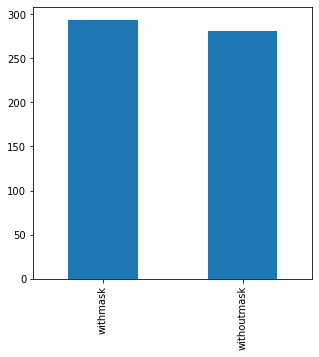

In [26]:
# How many images are there of each breed?
import matplotlib.pyplot as plt
labels_csv["labels"].value_counts().plot.bar(figsize=(5, 5));

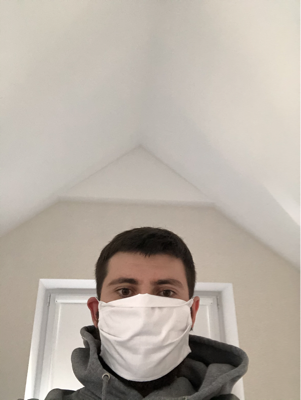

In [27]:
# Let's view an image
from IPython.display import Image
Image("FULL_DATA/withmask.0.jpeg")

In [28]:
# Create pathnames from image ID's
filenames = ["FULL_DATA/" + fname for fname in labels_csv["filename"]]

# Check the first 15
filenames[:15]

['FULL_DATA/withmask.0.jpeg',
 'FULL_DATA/withmask.1.jpeg',
 'FULL_DATA/withmask.10.jpeg',
 'FULL_DATA/withmask.100.jpeg',
 'FULL_DATA/withmask.101.jpeg',
 'FULL_DATA/withmask.102.jpeg',
 'FULL_DATA/withmask.103.jpeg',
 'FULL_DATA/withmask.104.jpeg',
 'FULL_DATA/withmask.105.jpeg',
 'FULL_DATA/withmask.106.jpeg',
 'FULL_DATA/withmask.107.jpeg',
 'FULL_DATA/withmask.108.jpeg',
 'FULL_DATA/withmask.109.jpeg',
 'FULL_DATA/withmask.11.jpeg',
 'FULL_DATA/withmask.110.jpeg']

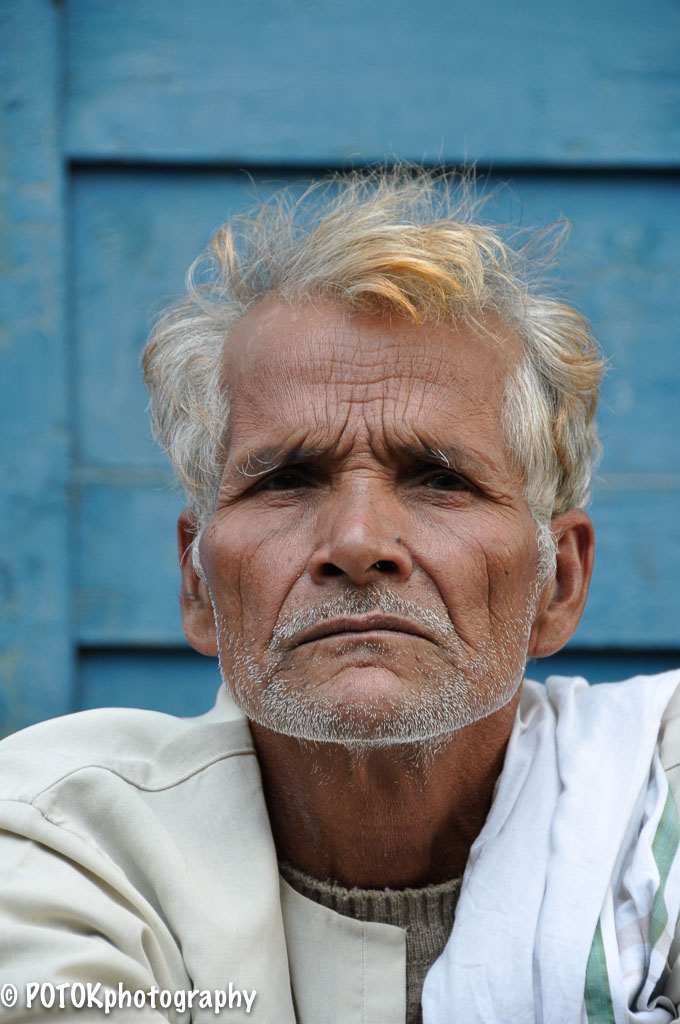

In [33]:
# One more check
Image(filenames[570])

In [34]:
labels_csv["labels"][570]

'withoutmask'

In [51]:
filenames[42]

'FULL_DATA/withmask.136.jpeg'

let's prepare our labels.

In [37]:
import numpy as np
labels = labels_csv["labels"].to_numpy() 
labels

array(['withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withma

In [38]:
len(labels)

575

In [39]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("labels matches number of filenames!")
else:
  print("labels does not match number of filenames")

labels matches number of filenames!


In [40]:
# Find the unique label values
unique_category = np.unique(labels)
len(unique_category)

2

In [41]:
unique_category

array(['withmask', 'withoutmask'], dtype=object)

### Turn label into an array of booleans

In [42]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_category

withmask


array([ True, False])

In [43]:
# Turn every label into a boolean array
boolean_labels = [label == unique_category for label in labels]
boolean_labels[:2]

[array([ True, False]), array([ True, False])]

In [44]:
len(boolean_labels)

575

In [45]:
filenames[:10]

['FULL_DATA/withmask.0.jpeg',
 'FULL_DATA/withmask.1.jpeg',
 'FULL_DATA/withmask.10.jpeg',
 'FULL_DATA/withmask.100.jpeg',
 'FULL_DATA/withmask.101.jpeg',
 'FULL_DATA/withmask.102.jpeg',
 'FULL_DATA/withmask.103.jpeg',
 'FULL_DATA/withmask.104.jpeg',
 'FULL_DATA/withmask.105.jpeg',
 'FULL_DATA/withmask.106.jpeg']

### Creating our own validation set

In [46]:
# Setup X & y variables

X = filenames
y = boolean_labels

In [47]:
# Let's split data
from sklearn.model_selection import train_test_split

# Into train and valid 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(460, 115, 460, 115)

In [48]:
# Let's show data
X_train[:5],y_train[:5]

(['FULL_DATA/withmask.16.jpeg',
  'FULL_DATA/withmask.42.jpeg',
  'FULL_DATA/withmask.155.jpeg',
  'FULL_DATA/withoutmask.226.jpeg',
  'FULL_DATA/withmask.152.jpeg'],
 [array([ True, False]),
  array([ True, False]),
  array([ True, False]),
  array([False,  True]),
  array([ True, False])])

## Preprocessing Images

Befor we do, let's see what image looks like in to tensors

In [49]:
# Convert images to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(278, 400, 4)

In [50]:
# Convert in to tensor by tf.constant
tf.constant(image)

<tf.Tensor: shape=(278, 400, 4), dtype=float32, numpy=
array([[[0.09803922, 0.09019608, 0.09411765, 0.6       ],
        [0.09803922, 0.09019608, 0.09803922, 0.6       ],
        [0.09803922, 0.09019608, 0.09411765, 0.6       ],
        ...,
        [0.09803922, 0.09803922, 0.09803922, 0.6       ],
        [0.09019608, 0.09019608, 0.09803922, 0.6       ],
        [0.09019608, 0.09019608, 0.09411765, 0.6       ]],

       [[0.09803922, 0.09019608, 0.09411765, 1.        ],
        [0.09803922, 0.09411765, 0.09411765, 1.        ],
        [0.09411765, 0.09019608, 0.09411765, 1.        ],
        ...,
        [0.09411765, 0.09411765, 0.09411765, 1.        ],
        [0.09411765, 0.09411765, 0.10196079, 1.        ],
        [0.09019608, 0.09019608, 0.09411765, 1.        ]],

       [[0.09803922, 0.09411765, 0.09411765, 1.        ],
        [0.09411765, 0.09411765, 0.09411765, 1.        ],
        [0.09019608, 0.09019608, 0.09019608, 1.        ],
        ...,
        [0.09411765, 0.09411765,

### TURNING IMAGES INTO TENSOR

A Function for Preprocessing images:
  1. Take an image filepath as input
  2. Use **Tensorflow** to read the file and save it to a variable `image`
  3. Turn our `image` into Tensors
  4. Normalize our image 
  5. Resize the `images` to be a shape of (224,224)
  6. Return the modified `images`

In [52]:
# Define image size
IMG_SIZE = 224

# Function
def process_image(image_path, image_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 colour channel(RGB)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the color channel values to (0-1) values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to (224,224)
  image = tf.image.resize(image, size=[image_size,image_size])

  return image

## Turning our data into Batches

In [53]:
# Create a function to return a tuple (image, label)
def get_image_lable(image_path,label):
  """
  Takes an image file path name and the label,
  processes the image and return a tuple (image, label).
  """
  image = process_image(image_path)
  
  return image,label

In [54]:
# Define the batch size
BATCH_SIZE = 32

# Function to convert data into batches
def create_data_batches(X,y=None, batch_size=BATCH_SIZE,valid_data=False):
  """
  Creates batches of data of image (X) and label (y) pairs.
  Shuffle the data if it's training data but doesn't shuffle if it's validation data.
  """
  # If data is valid dataset (NO SHUFFLE)
  if valid_data:
    print("Creating valid data batches.........")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_lable).batch(batch_size)
    return data_batch

  else:
    print("Creating train data batches.........")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathname and labels before mapping image processor fun
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_lable).batch(batch_size)

    return data_batch

In [55]:
# Creat training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating train data batches.........
Creating valid data batches.........


In [56]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [57]:
import matplotlib.pyplot as plt
# Create fun for viewing in a data batch
def show_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(20, 20))
  for i in range(25):
    # Subplot
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_category[labels[i].argmax()])
    plt.axis("Off")

In [58]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.66895133, 0.6728729 , 0.61797094],
          [0.66895133, 0.6728729 , 0.61797094],
          [0.6778615 , 0.6817831 , 0.6268811 ],
          ...,
          [0.70152223, 0.7054438 , 0.6426987 ],
          [0.69934344, 0.703265  , 0.6405199 ],
          [0.70980394, 0.7137255 , 0.6509804 ]],
 
         [[0.6784314 , 0.68235296, 0.627451  ],
          [0.6784314 , 0.68235296, 0.627451  ],
          [0.6852854 , 0.68920696, 0.634305  ],
          ...,
          [0.69609594, 0.7000175 , 0.64511555],
          [0.6893748 , 0.6932964 , 0.6383944 ],
          [0.6961673 , 0.70008886, 0.6451869 ]],
 
         [[0.6764872 , 0.6804088 , 0.6255068 ],
          [0.6822863 , 0.6862079 , 0.63130593],
          [0.6777486 , 0.6816702 , 0.62676823],
          ...,
          [0.70161945, 0.70161945, 0.6545606 ],
          [0.69417846, 0.69417846, 0.64711964],
          [0.7019608 , 0.7019608 , 0.654902  ]],
 
         ...,
 
         [[0.71440816, 0.72595495, 0.6828177 ],
          [0.71902

In [59]:
len(train_images), len(train_labels)

(32, 32)

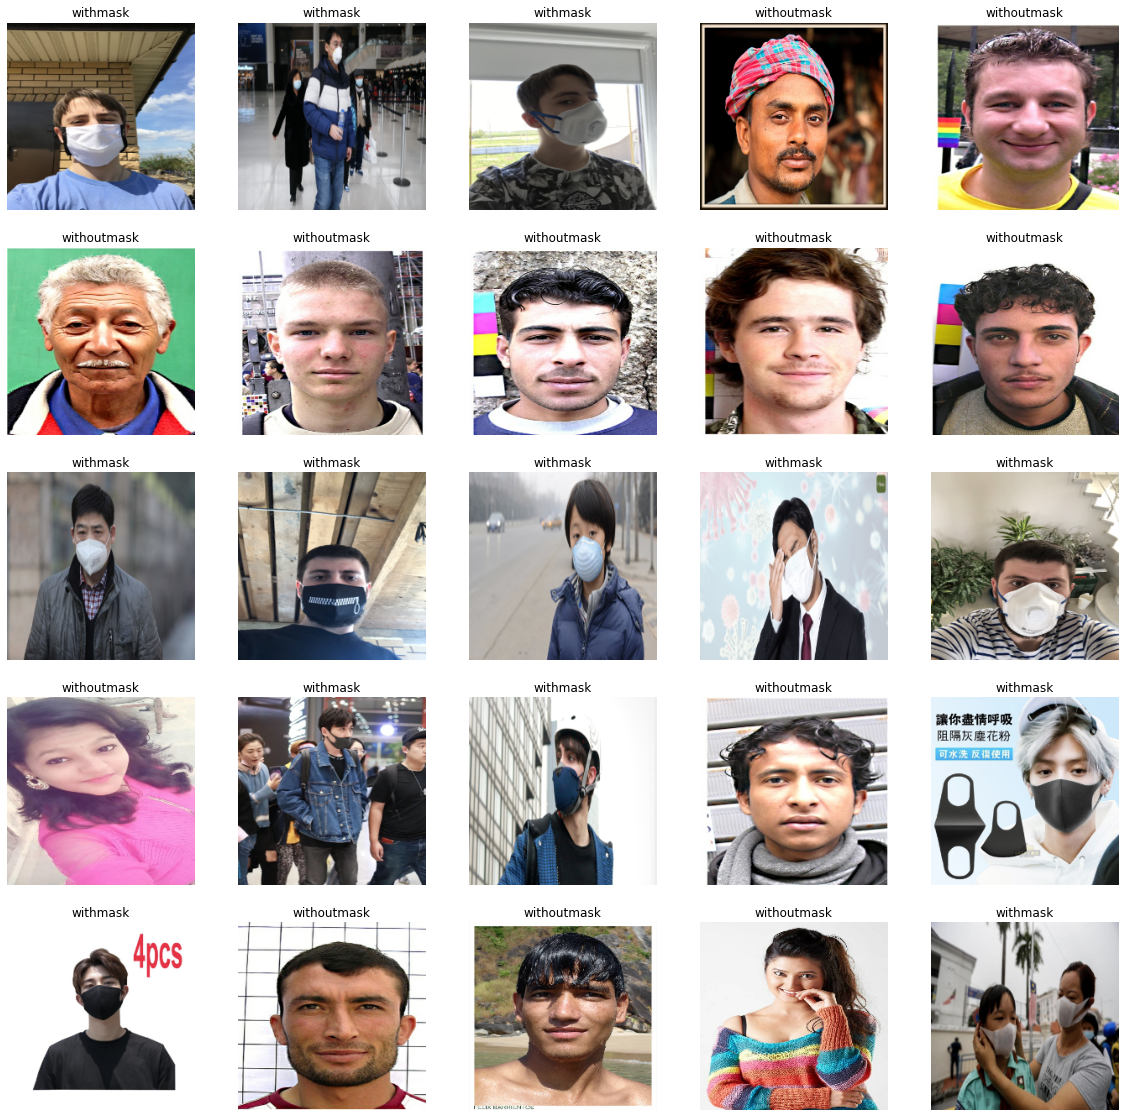

In [60]:
# let's show data
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images,train_labels)

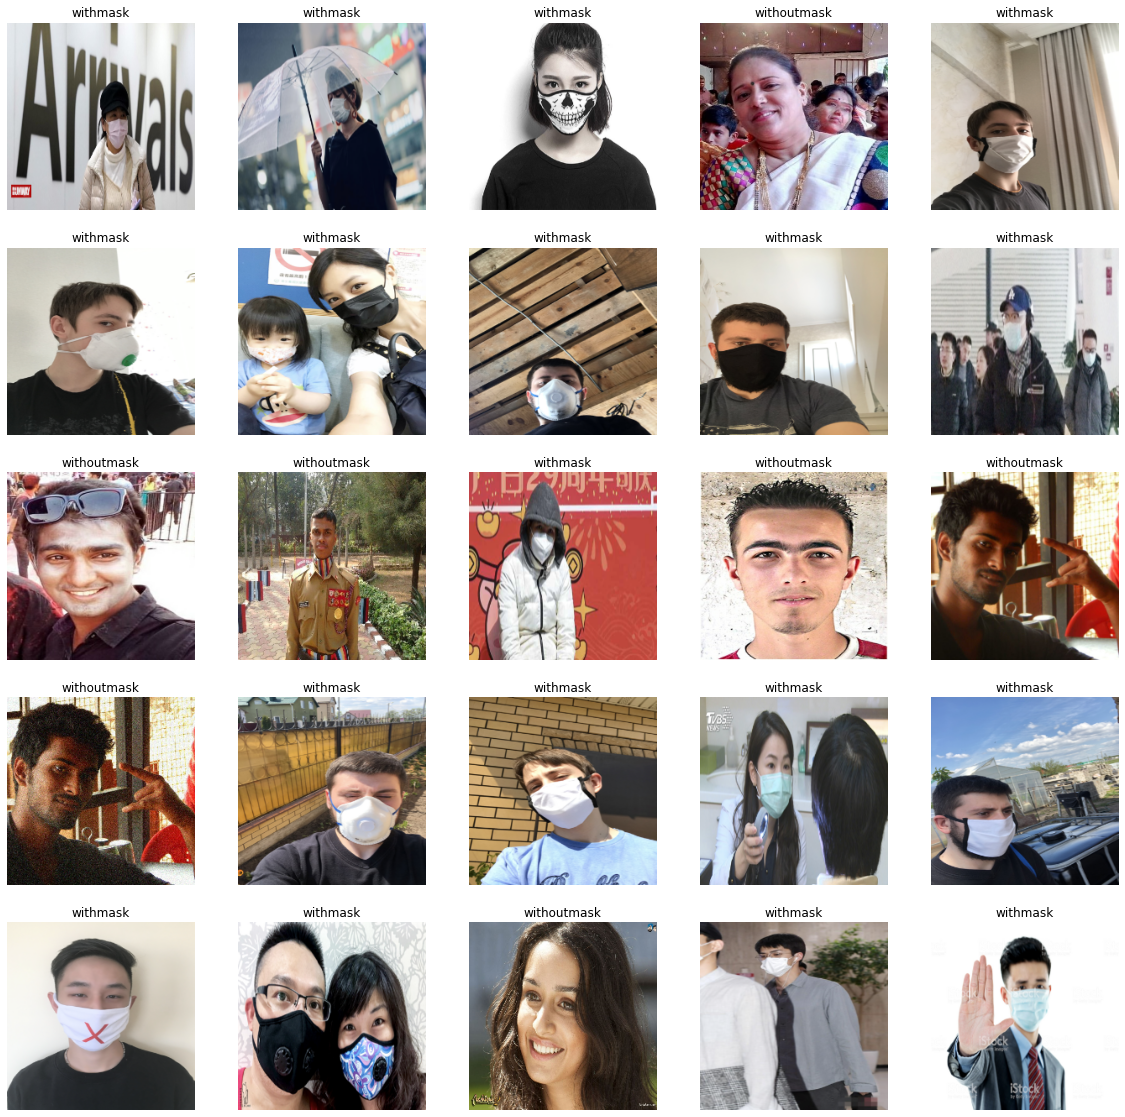

In [61]:
# For valid data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

## Building a model 

Before we build a model--->

* The input shape.
* The output shape.
* The URL of the model we want to use.

In [62]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, Colour_chanels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_category)

# Setup model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [63]:
# Create a fun to build a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url),
                               tf.keras.layers.Dense(units=output_shape, 
                                                     activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [64]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 2)                 2004      
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

### TesnorBoard Callback

# Load TensorBoard notebook extension
#%reload_ext tensorboard

import datetime
import os
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  logdir = os.path.join("log",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

In [65]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

## Training a model

In [66]:
NUM_EPOCHS = 25

In [67]:
# Build a function to train and return a trained model
def train_model():
  #tensorboard = create_tensorboard_callback()
  
  # Fit the model
  model.fit(x=train_data,
            epochs= NUM_EPOCHS,
            validation_data=val_data,
            validation_freq = 1,
            callbacks=[early_stopping])
    
  return model

In [68]:
# Fit the data
model = train_model()

Epoch 1/25
15/15 [==============================] - 14s 952ms/step - loss: 0.2647 - accuracy: 0.8913 - val_loss: 0.0441 - val_accuracy: 0.9913
Epoch 2/25
15/15 [==============================] - 13s 858ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 3/25
15/15 [==============================] - 14s 955ms/step - loss: 0.0149 - accuracy: 0.9978 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4/25
15/15 [==============================] - 14s 930ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/25
15/15 [==============================] - 14s 927ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000


## Making and evaluating prediction using a trained model

In [69]:
# Make prediction on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

4/4 [==============================] - 2s 534ms/step


array([[9.74001348e-01, 2.59987079e-02],
       [9.99277413e-01, 7.22561905e-04],
       [9.99301434e-01, 6.98512478e-04],
       [1.87730289e-03, 9.98122633e-01],
       [9.95595515e-01, 4.40450385e-03],
       [9.99869704e-01, 1.30255445e-04],
       [9.99963880e-01, 3.61438979e-05],
       [9.99999285e-01, 7.54938981e-07],
       [9.97002780e-01, 2.99725425e-03],
       [9.99986291e-01, 1.36632571e-05],
       [6.40084792e-04, 9.99359906e-01],
       [3.13801318e-03, 9.96862054e-01],
       [9.90680277e-01, 9.31975059e-03],
       [5.21943866e-06, 9.99994755e-01],
       [2.45666539e-04, 9.99754369e-01],
       [9.19151498e-05, 9.99908090e-01],
       [9.97723162e-01, 2.27684854e-03],
       [9.99934435e-01, 6.55372132e-05],
       [9.99974847e-01, 2.51833571e-05],
       [9.99971747e-01, 2.82322981e-05],
       [9.99979496e-01, 2.05424531e-05],
       [9.92810667e-01, 7.18927989e-03],
       [6.75897580e-04, 9.99324083e-01],
       [9.91062522e-01, 8.93747807e-03],
       [9.982898

In [70]:
predictions.shape

(115, 2)

In [71]:
np.sum(predictions[0])

1.0

In [72]:
def make_prediction(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """

  return unique_category[np.argmax(prediction_probabilities)]

In [73]:
pred_label = make_prediction(predictions[17])
pred_label

'withmask'

In [74]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

In [75]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_category[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.8970589 , 0.9127452 , 0.9245099 ],
         [0.8980393 , 0.91372555, 0.92549026],
         [0.89607847, 0.9111673 , 0.9235295 ],
         ...,
         [0.90490204, 0.9127452 , 0.90216   ],
         [0.9029412 , 0.91078436, 0.9068628 ],
         [0.8898132 , 0.8976563 , 0.89373475]],
 
        [[0.8970589 , 0.9127452 , 0.9245099 ],
         [0.900429  , 0.9161153 , 0.92788   ],
         [0.89607847, 0.9088236 , 0.9235295 ],
         ...,
         [0.90549946, 0.9133426 , 0.90533096],
         [0.9023438 , 0.91018695, 0.9062654 ],
         [0.8927544 , 0.9005975 , 0.89667594]],
 
        [[0.8970589 , 0.9127452 , 0.9245099 ],
         [0.90194553, 0.9176318 , 0.9293965 ],
         [0.89514405, 0.91078436, 0.92549026],
         ...,
         [0.90690875, 0.91470593, 0.9109222 ],
         [0.89901966, 0.9068628 , 0.9029412 ],
         [0.89701295, 0.9048561 , 0.9009345 ]],
 
        ...,
 
        [[0.77555156, 0.77163   , 0.79123783],
         [0.7765166 , 0.77259505, 0.79220

In [76]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = make_prediction(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

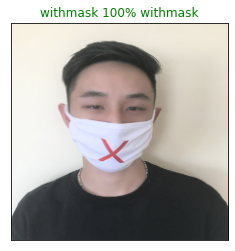

In [79]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=20)

In [80]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = make_prediction(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_category[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

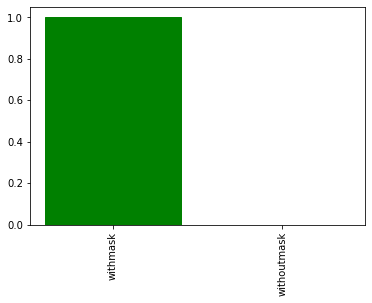

In [81]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

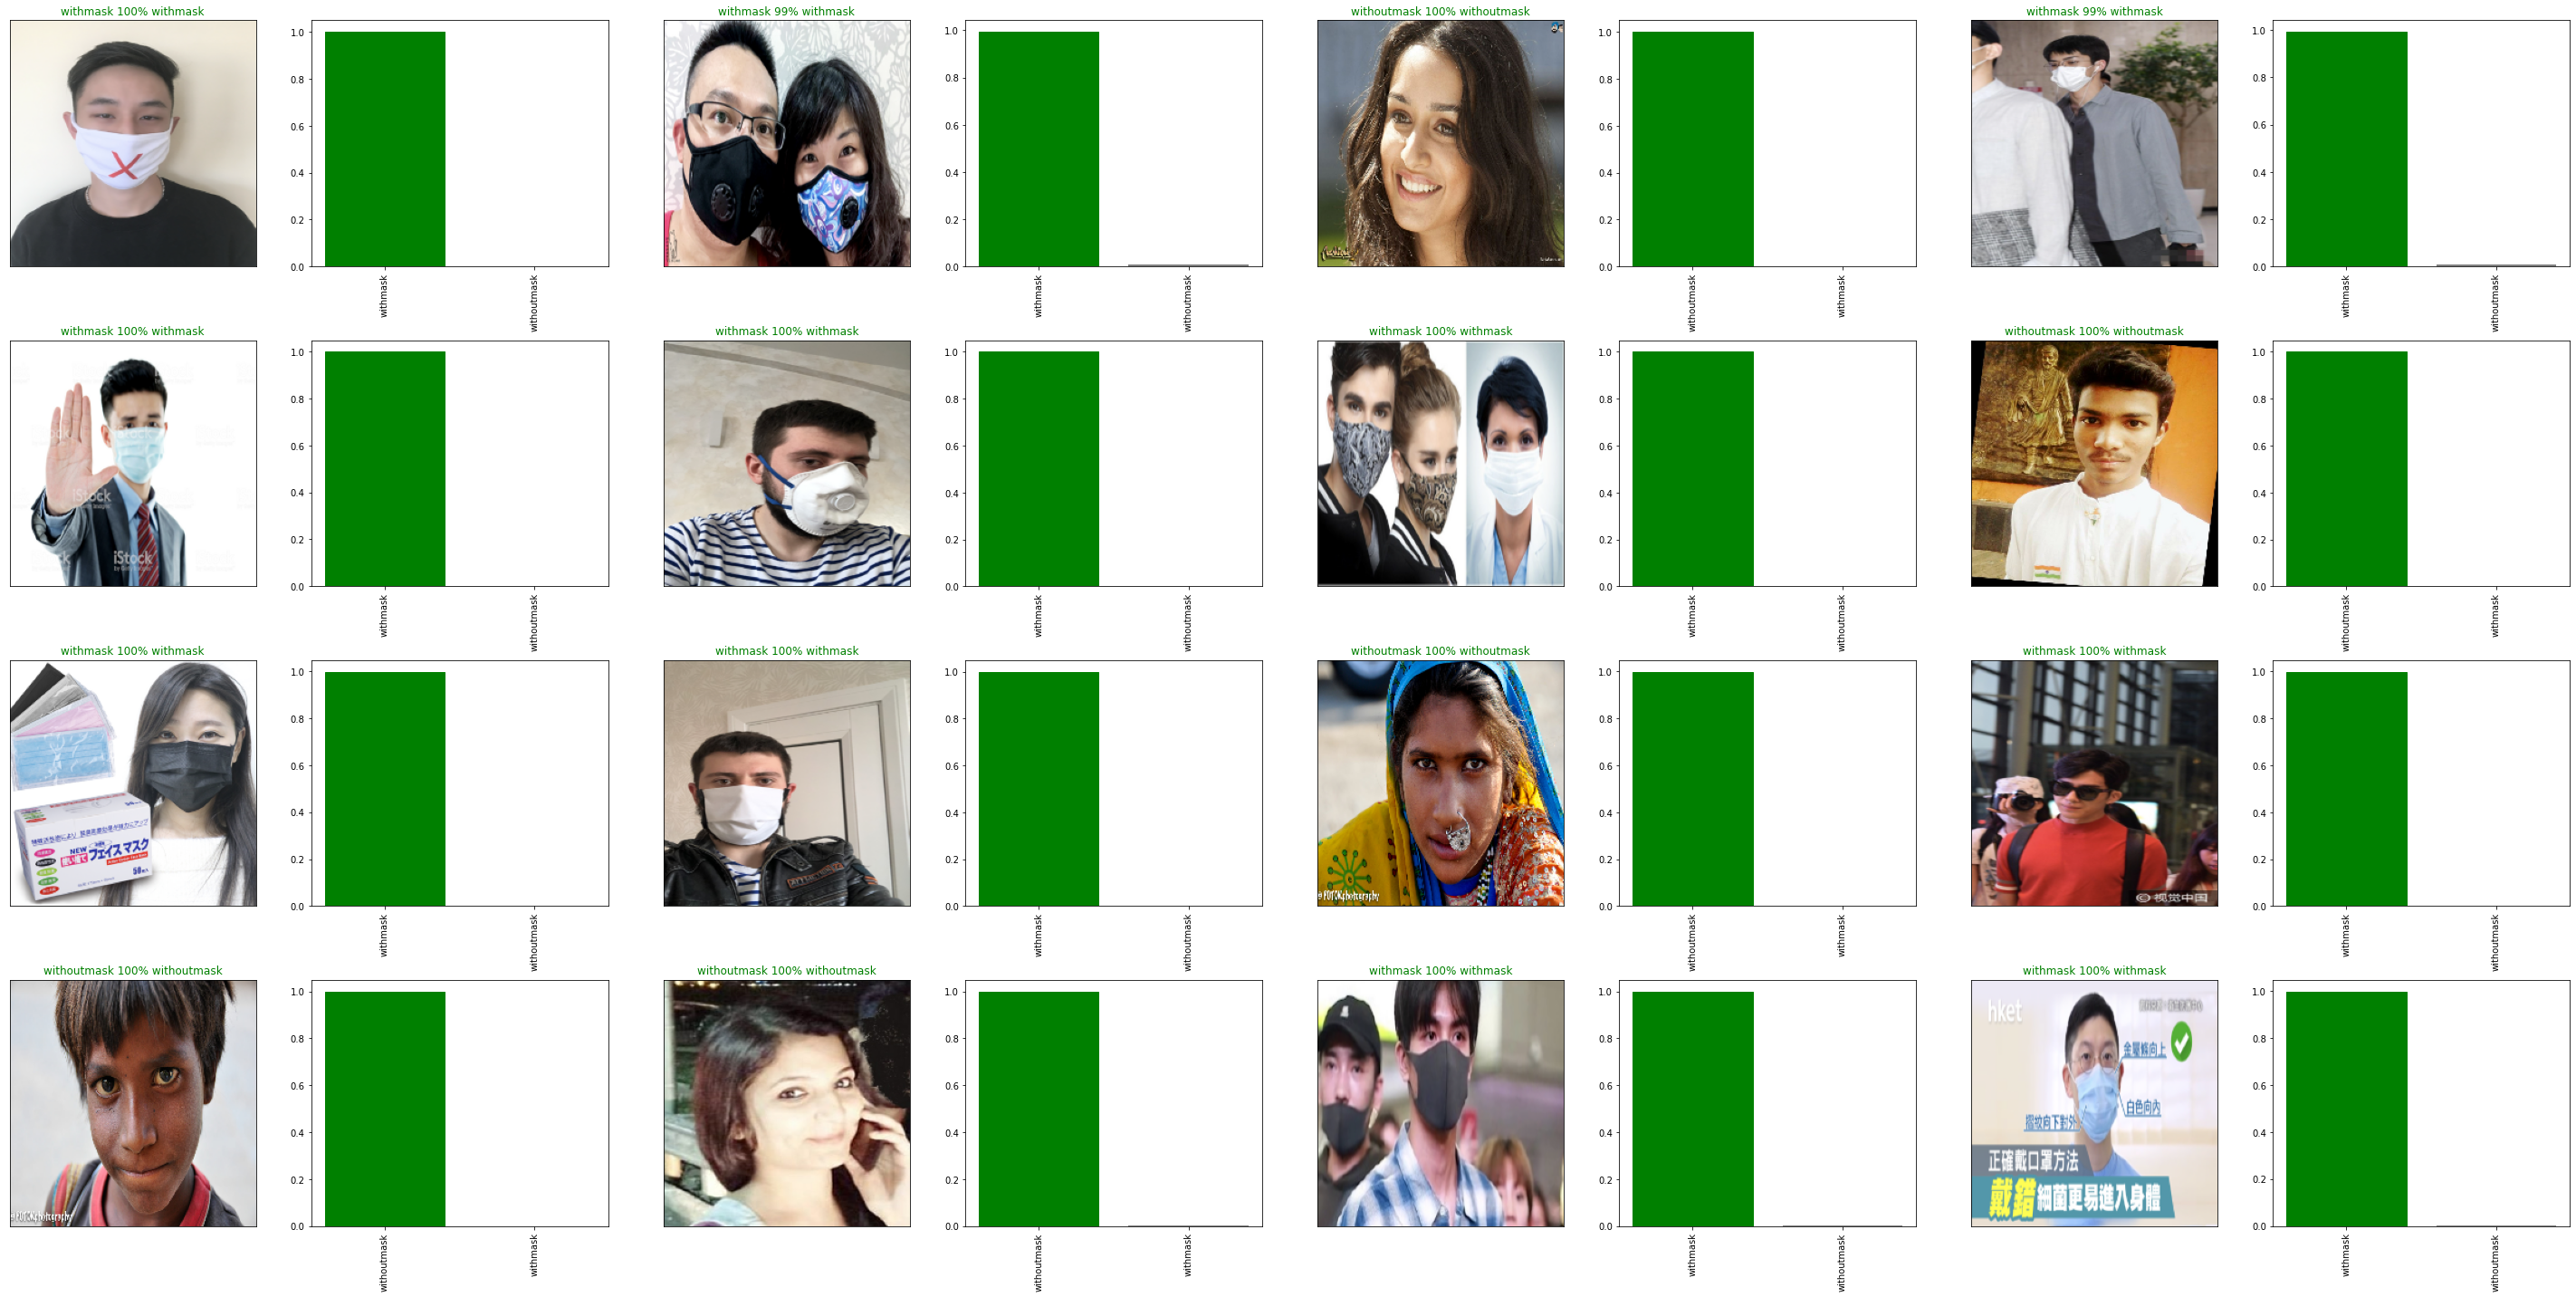

In [82]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [83]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = "model/"
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [84]:
# Save our model trained on 1000 images
save_model(model, suffix="mobilenetv2-Adam")

Saving model to: model/-mobilenetv2-Adam.h5...


'model/-mobilenetv2-Adam.h5'

In [85]:
# Evaluate the pre-saved model
model.evaluate(val_data)

4/4 [==============================] - 2s 510ms/step - loss: 0.0096 - accuracy: 1.0000


[0.00964925903826952, 1.0]

## Predict on custom data

In [86]:
def test_data(path):
  demo = imread(path)
  demo = tf.image.convert_image_dtype(demo,tf.float32)
  demo = tf.image.resize(demo,size=[224,224])
  demo = np.expand_dims(demo,axis=0)

  pred = model.predict(demo)
  result = unique_category[np.argmax(pred)]

  return result

TEST0
![image](test0.jpeg)

In [87]:
test_data('test0.jpeg')

'withmask'

TEST1
![image](test1.jpeg)

In [89]:
test_data('test1.jpeg')

'withmask'

TEST4
![image](test4.jpeg)

In [91]:
test_data('test4.jpeg')

'withoutmask'